<a href="https://colab.research.google.com/github/kasravalid/coursera/blob/main/divar_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gdrive/My Drive/housing-Raoofi.csv')
df.head()

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,153,1393,3,True,True,True,۱ ساعت پیش در تهران، درکه,۱۸٬۳۶۰٬۰۰۰٬۰۰۰ تومان
1,418,1382,4,True,True,True,۱ ساعت پیش در تهران، زعفرانیه,۱۳۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان
2,57,1385,2,False,False,True,۱ ساعت پیش در تهران، جابری,۲٬۶۰۰٬۰۰۰٬۰۰۰ تومان
3,193,1371,3,False,False,True,۱ ساعت پیش در تهران، فرمانیه,۲۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان
4,62,1401,1,True,True,True,۱ ساعت پیش در تهران، دهکده المپیک، بزرگراه همت...,۱٬۴۱۰٬۰۰۰٬۰۰۰ تومان


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:

df = pd.read_csv('gdrive/My Drive/housing-Raoofi.csv')
df.head()

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,153,1393,3,True,True,True,۱ ساعت پیش در تهران، درکه,۱۸٬۳۶۰٬۰۰۰٬۰۰۰ تومان
1,418,1382,4,True,True,True,۱ ساعت پیش در تهران، زعفرانیه,۱۳۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان
2,57,1385,2,False,False,True,۱ ساعت پیش در تهران، جابری,۲٬۶۰۰٬۰۰۰٬۰۰۰ تومان
3,193,1371,3,False,False,True,۱ ساعت پیش در تهران، فرمانیه,۲۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان
4,62,1401,1,True,True,True,۱ ساعت پیش در تهران، دهکده المپیک، بزرگراه همت...,۱٬۴۱۰٬۰۰۰٬۰۰۰ تومان


In [5]:
def separating_neighbourhood(Address):
    if '،' in Address:
        return Address.split('،')[1].split('|')[0].strip()
    else:
        return 'Unknown'
df['Address'] = df['Address'].apply(separating_neighbourhood)
unique_neighborhoods = df['Address'].unique()
unique_neighborhood_count = df['Address'].value_counts()
print(unique_neighborhood_count)

Address
پونک                      4605
سعادت‌آباد                3583
دریاچه شهدای خلیج فارس    2878
کوی فردوس                 2573
چیتگر                     2380
                          ... 
حسن‌آباد باقرفر              2
شهرک آسمان                   2
شهرک غزالی                   1
فتح                          1
شهرک شریفی                   1
Name: count, Length: 337, dtype: int64


In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["Address"]] = enc.fit_transform(df[["Address"]])


In [8]:
!pip install unidecode
from unidecode import unidecode
def convert_price(price):
  price = price.split(' ')[0].strip()
  price = unidecode(price)
  if "," in price:
    price = price.replace(",", "")
    return int(price)
  return np.nan

df['Price'] = df['Price'].apply(convert_price)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.8 MB/s eta 0:00:00


In [9]:
df['Warehouse'] = df['Warehouse'].astype(int)
df['Parking'] = df['Parking'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

df['House_Age'] = 1402 - df['Construction']

df = df.drop('Construction', axis=1)

df = df[['Area', 'House_Age', 'Warehouse', 'Parking', 'Elevator', 'Address', 'Price']]
df.head()

,Area,House_Age,Warehouse,Parking,Elevator,Address,Price
0,153,9,1,1,1,118.0,1.836000e+10
1,418,20,1,1,1,135.0,1.300000e+11
2,57,17,0,0,1,73.0,2.600000e+09
3,193,31,0,0,1,242.0,2.300000e+10
4,62,1,1,1,1,125.0,1.410000e+09


In [10]:
df.describe()

,Area,House_Age,Warehouse,Parking,Elevator,Address,Price
count,94035.000000,94035.000000,94035.000000,94035.000000,94035.000000,94035.000000,9.379000e+04
mean,125.339884,8.998660,0.812038,0.872643,0.948466,176.875525,1.452574e+10
std,267.502120,7.743396,0.390684,0.333374,0.221085,103.170483,2.737502e+10
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.300000e+08
25%,74.000000,1.000000,1.000000,1.000000,1.000000,82.000000,4.900000e+09
50%,106.000000,7.000000,1.000000,1.000000,1.000000,156.000000,8.580000e+09
75%,141.000000,16.000000,1.000000,1.000000,1.000000,288.000000,1.550000e+10
max,36500.000000,31.000000,1.000000,1.000000,1.000000,336.000000,1.000000e+12


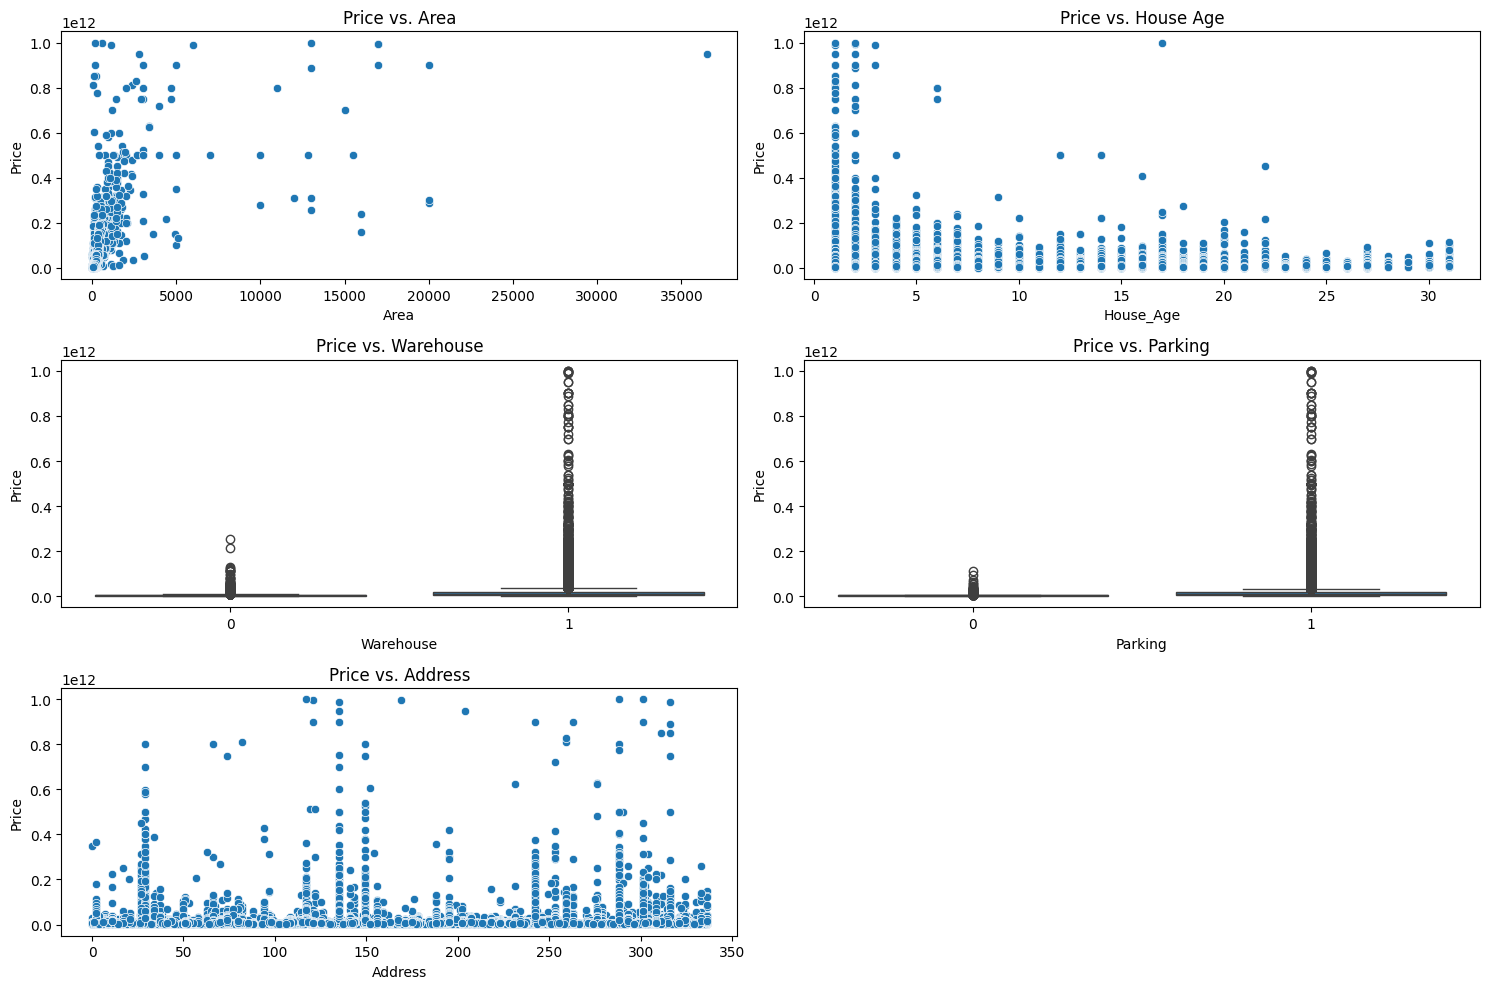

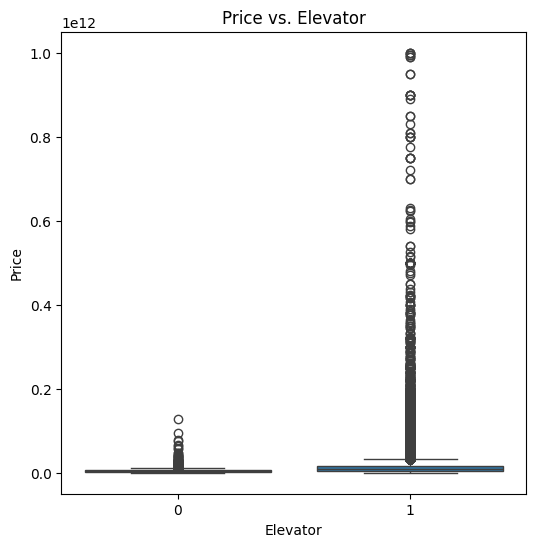

In [14]:
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='Area', y='Price')
plt.title('Price vs. Area')

plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x='House_Age', y='Price')
plt.title('Price vs. House Age')

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='Warehouse', y='Price')
plt.title('Price vs. Warehouse')

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='Parking', y='Price')
plt.title('Price vs. Parking')

plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='Address', y='Price')
plt.title('Price vs. Address')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Elevator', y='Price')
plt.title('Price vs. Elevator')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df['Log_Price'] = np.log(df['Price'])
df['Log_Area'] = np.log(df['Area'])
df = df.dropna(subset=['Log_Price', 'Log_Area'])

X = df[['Log_Area', 'House_Age', 'Warehouse', 'Parking', 'Elevator', 'Address']]
y = df['Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

R-squared: 0.7415565466524607
           Coefficient
Log_Area      1.491927
House_Age     0.007043
Warehouse     0.178616
Parking       0.167438
Elevator      0.156336
Address       0.000125


KNN MSE: 0.09366252559254708
KNN R-squared: 0.8908691618736619
Random Forest MSE: 0.07849952970357243
Random Forest R-squared: 0.908536317861624
Feature Importances:
           Importance
Log_Area     0.788250
House_Age    0.033012
Warehouse    0.005594
Parking      0.011036
Elevator     0.003698
Address      0.158411


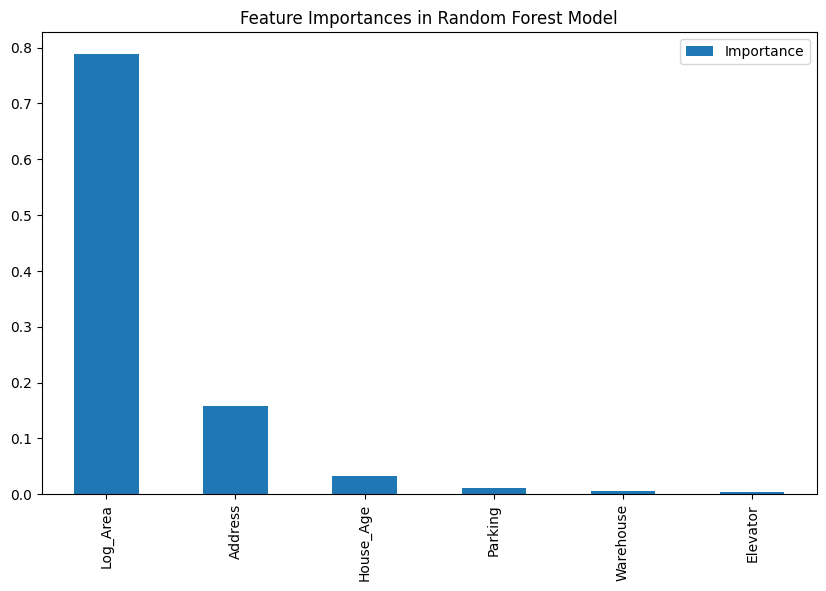

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# KNN
knn_pred = cross_val_predict(knn, X, y, cv=kf)
knn_mse = mean_squared_error(y, knn_pred)
knn_r2 = r2_score(y, knn_pred)

print(f'KNN MSE: {knn_mse}')
print(f'KNN R-squared: {knn_r2}')

# Random Forest
rf_pred = cross_val_predict(rf, X, y, cv=kf)
rf_mse = mean_squared_error(y, rf_pred)
rf_r2 = r2_score(y, rf_pred)

print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')

# Important Features
rf.fit(X, y)
feature_importances = pd.DataFrame(rf.feature_importances_, X.columns, columns=['Importance'])

print("Feature Importances:")
print(feature_importances)

feature_importances.sort_values(by='Importance', ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances in Random Forest Model')
plt.show()

